In [1]:
#set up the working environment by calling toolkits
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Let's go out into the world and generate some beautiful visuals. Pick a data source from this aggregation, load the data into a pandas data frame, and generate a series of visuals around that data using pyplot.
Each visualization should be accompanied by 2-3 sentences describing what you think is revealed by this representation. Generate at least four different visuals, and be sure to use different types as well as the subplot functionality discussed above. And remember: clean and elegant visuals are key to telling a coherent story.
Collect your images and descriptions into a shareable format. A Jupyter notebook is best, but anything you can link to is fine, including Google docs or markdown files on GitHub or gists, and share the link below.

Open Payments is a national transparency program that collects and publishes information about financial relationships between the health care industry (i.e. drug and device companies) and providers (i.e. physicians and teaching hospitals). These relationships may involve payments to providers for things such as research, meals, travel, gifts, or speaking fees. This data is collected and provided by Centers for Medicare & Medicaid Services (CMS).  This data set represents payments made during 2017.

In [2]:
# import data file to a dataframe
pay_data = pd.read_csv('OP_DTL_RSRCH_PGYR2017_P01182019.csv',low_memory=False)


In [3]:
pay_data['Recipient_Country'].describe()


count            601887
unique                9
top       United States
freq             601416
Name: Recipient_Country, dtype: object

In [4]:
pay_data['Recipient_State'].describe()

count     601416
unique        53
top           CA
freq       66736
Name: Recipient_State, dtype: object

In [5]:
pay_data.ClinicalTrials_Gov_Identifier.value_counts()

NCT02694328    9502
NCT02097290    6188
NCT02537574    4890
NCT02873208    4578
NCT01663402    4027
NCT02234583    3497
NCT02414854    3149
NCT02691494    2170
NCT02787551    2133
NCT03211858    2024
NCT02451137    2022
NCT02696434    1950
NCT02654054    1943
NCT02634307    1915
NCT02634346    1622
NCT02926950    1539
NCT01914393    1524
NCT02134028    1396
NCT02706847    1378
NCT02629159    1359
NCT02896296    1269
NCT02782741    1260
NCT01858532    1256
NCT02657889    1254
NCT01887912    1252
NCT02187471    1246
NCT02688933    1203
NCT02141399    1071
NCT02683239     957
NCT02039726     908
               ... 
NCT01113957       1
NCT01209169       1
NCT01196208       1
NCT03325816       1
NCT02008318       1
NCT01550484       1
NCT03156621       1
NCT03367377       1
NCT03126877       1
NCT02141997       1
NCT02300259       1
NCT02190500       1
NCT02970306       1
NCT01463631       1
NCT02706551       1
NCT01515306       1
NCT01911845       1
NCT02369663       1
NCT01122927       1


In [57]:
# First, let's find out how many clinical trials received a payment during 2017 for each country
# We'll need to group the data by the column containing the Clinical Trials ID Number: ClinicalTrials_Gov_Identifier
# Then, we'll retrieve the records containing a trial id.  The records that are blank or nonclinical will be excluded from the count
# Finally, we'll count the records for each country and produce some pictures

# Mark records that are for clinical trials
pay_data['Trials_Ind'] = np.where(pay_data['ClinicalTrials_Gov_Identifier'].str.startswith("N"),True,False)
# Reduce data set to only clinical trials
clinical = pay_data[pay_data['Trials_Ind'] == True]
# Reduce data set to 3 columns of interest
clinical_sub = clinical[['Recipient_Country','Total_Amount_of_Payment_USDollars','Trials_Ind']]

# Add Country abbreviation for data ease
country_abbrv = pd.DataFrame()
ctry_name = ['Belgium','Canada','Denmark','Germany','Great Britain (Uk)','Japan','Poland','United States','United States Minor Outlying Islands']
ctry_abbr = ['BE','CA','DN','DE','GB','JP','PL','US','UM']
country_abbrv['Recipient_Country'] = ctry_name
country_abbrv['Ctry_Abbr'] = ctry_abbr
clinical_final = clinical_sub.merge(country_abbrv, on='Recipient_Country', how='left')

# Count trials by Country
clinical_cnt = clinical_final.groupby(['Ctry_Abbr'], as_index=False)['Trials_Ind'].count()

# Sum payment amounts by Country
clinical_amt = clinical_final.groupby(['Ctry_Abbr'], as_index=False)['Total_Amount_of_Payment_USDollars'].sum()


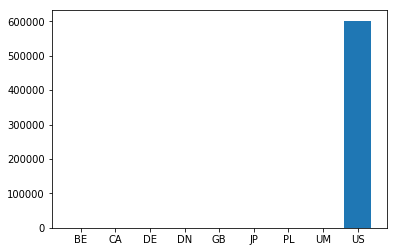

In [58]:
names = clinical_cnt['Ctry_Abbr'].tolist()
counts = clinical_cnt['Trials_Ind'].tolist()
amounts = clinical_amt['Total_Amount_of_Payment_USDollars'].tolist()

plt.bar(names, counts)
plt.show()

US is so predominant that the other countries appear to be zero when viewed in scale
Will need to view US separately from other countries to get better visual comparative


In [59]:
# Drop US
names = names[:-1]
counts = counts[:-1]
amounts = amounts[:-1]


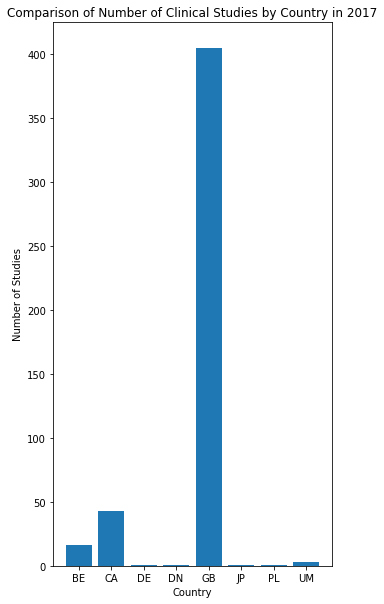

In [60]:
# Here is a view after dropping US

plt.figure(figsize=(5,10))
plt.bar(names, counts)
plt.title('Comparison of Number of Clinical Studies by Country in 2017')
plt.xlabel('Country') 
plt.ylabel('Number of Studies')
plt.show()

Now Great Brittain is taking up the greatest visual and making it difficult to see a good comparison
Let's try a pie chart

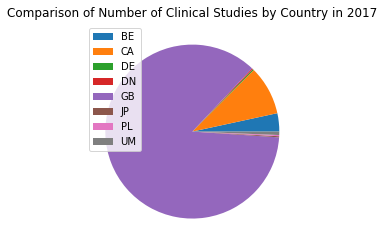

In [61]:
plt.pie(counts)
plt.title('Comparison of Number of Clinical Studies by Country in 2017')
plt.legend(names)
plt.show()

The bar chart is more helpful in this instance, even though, the bar chart tells us that our data is way too skewed
to allow a nice visual comparison.  Let's separate Great Brittain and look again.

In [62]:
# Drop GB
index = names.index('GB')
names = names[:index] + names[index+1:]
counts = counts[:index] + counts[index+1:]
amounts = amounts[:index] + amounts[index+1:]


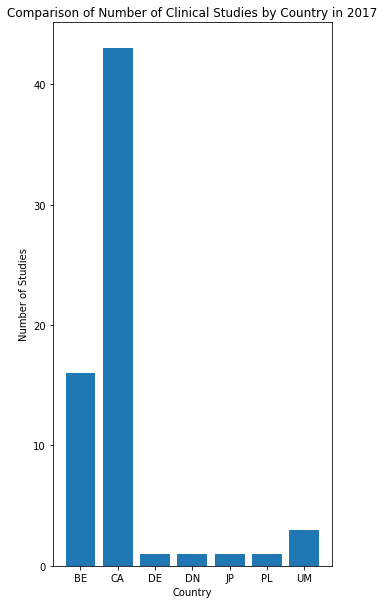

In [63]:
# Here is a view after dropping GB
plt.figure(figsize=(5,10))
plt.bar(names, counts)
plt.title('Comparison of Number of Clinical Studies by Country in 2017')
plt.xlabel('Country') 
plt.ylabel('Number of Studies')
plt.show()

Even though Canada is now predominant in the visual, this one does provide comparability among the other countries
To get back to comparing everything, we can combine all of these countries and do a comparison with GB and US
while keeping this as a separate graph giving the breakdown of the other countries.  Let's see it in a pie chart before
moving on.

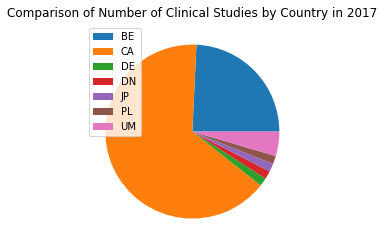

In [64]:
plt.pie(counts)
plt.title('Comparison of Number of Clinical Studies by Country in 2017')
plt.legend(names)
plt.show()

Besides easily seeing that about 2/3 of the studies were conducted in Canada and 1/4 in Belgium, there is not much 
more to conclude from this.  Let's see if adding a comparison to amounts paid out during 2017 gives any insights.

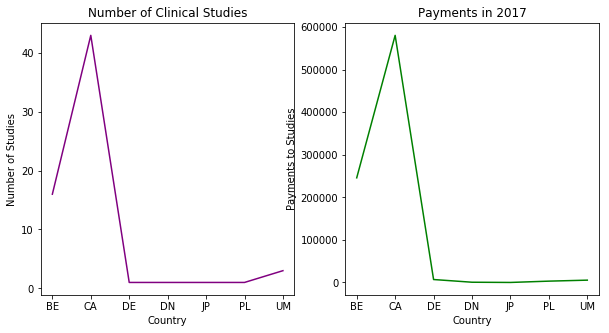

In [65]:
# View comparison of number of trials and payments made to non-US and Non-GB countries
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(names, counts, color='purple')
plt.xlabel('Country') 
plt.ylabel('Number of Studies')
plt.title('Number of Clinical Studies')

plt.subplot(1, 2, 2)
plt.plot(names,amounts, color='green')
plt.xlabel('Country') 
plt.ylabel('Payments to Studies')
plt.title('Payments in 2017')
plt.show()

This indicates that the payments made correspond almost in exact proportion to the number of studies.  One might hypothesize that there is a direct correlation between number of clinical trials and amounts paid.  Note that one might logically expect that the amount of payment would be related to the type of clinical trial underway.  This initial analysis would indicate that the type of trial, or more specifically, the objective of the trial has no bearing on the payment amount.  Naturally, additional data should be collected to verify this.  For instance, we might discover that all of these particular trials are at the same stage or perhaps there is a rule for disbursing funds that requires equal disbursements.